# Instructions

1. This exam is worth 20% of the final grade.
2. In the questions below, insert a cell (code or markdown, as appropriate), and fill in your answers there.
2. It is a take-home EXAMINATION to assess your understanding of the material, and extend the ideas by learning on your own. 
2. You are required to work on it individually. Any form of plagiarism will result in 0.
2. Good, efficient Python code will get more marks than code that is not neat, difficult to understand and least importantly, slow.
3. Please submit your notebook file (name it `IND5003_THE_<Your_Name>.ipynb`) through Canvas before **15th Oct 2023 23:59hrs**.

# Data

The files `MRCI_clus_2310.csv` and `MRCI_regr_2310.csv` contain information on institutional characteristics, enrollment, costs, and student outcomes for 856 and 851 four-year colleges, respectively, in the United States of America. The column headings are
* `ADM_RATE`: admission rate
* `SAT_AVG`: average SAT equivalent score of students admitted
* `UGDS`: enrollment of undergraduate degree-seeking students
* `COSTT4_A`: average cost of attendance
* `C150_4`: completion rate for first-time, full-time students (150% of expected time to completion)
* `UGDS_WOMEN`: total share of enrollment of undergraduate degree-seeking students who are women
* `STUFACR`: undergraduate student to instructional faculty ratio
* `MD_EARN_WNE_1YR`: median earnings of graduates working and not enrolled 1 year after completing
* `STATE`: Alabama, Alaska, ..., Wisconsin (the files do not contain colleges in Wyoming)

# Question 1: Clustering

**Use the data in the file `MRCI_clus_2310.csv`.**

Cluster the colleges on the five variables `ADM_RATE`, `SAT_AVG`, `C150_4`, `UGDS_WOMEN`, and `STUFACR` **after standardisation** using an **appropriately chosen** linkage method for **each of**
1. Euclidean distance
2. Manhattan distance

*You can choose an appropriate linkage method using what is known as the cophenetic correlation coefficient, but include a small paragraph or two on what is the cophenetic correlation coefficient and how you used it to choose your linkage mathod.*

In **each** case, use the silhouette scores to find the optimal or near-optimal number of clusters, and outline the properties/differences of the clusters you identified.

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean, cityblock
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
import matplotlib.pyplot as plt

In [2]:
cluster = pd.read_csv('../data/MRCI_clus_2310.csv')
scaler = StandardScaler()
data_std = scaler.fit_transform(cluster[['ADM_RATE', 'SAT_AVG', 'C150_4', 'UGDS_WOMEN', 'STUFACR']])
cluster

,ADM_RATE,SAT_AVG,C150_4,UGDS_WOMEN,STUFACR
0,0.7160,954.0,0.2807,0.5940,18.0
1,0.8854,1266.0,0.6245,0.6210,19.0
2,0.7367,1300.0,0.6072,0.4047,19.0
3,0.9799,955.0,0.2843,0.6495,13.0
4,0.7890,1244.0,0.7223,0.5615,19.0
...,...,...,...,...,...
851,0.8159,1150.0,0.4858,0.4983,22.0
852,0.6035,1197.0,0.7005,0.5026,9.0
853,0.7636,1098.0,0.4028,0.5686,15.0
854,1.0000,1154.0,0.2901,0.4223,18.0


#### The cophenetic correlation coefficient, also known as the "cophenetic correlation" or "cophenetic correlation coefficient," is a measure of a hierarchical clustering method's goodness of fit.The cophenetic correlation coefficient expresses how well hierarchical clustering retains pairwise distances (dissimilarities) between data points.

### Euclidean distance

In [3]:
link_single=linkage(data_std, method='single', metric='euclidean')
coph_coeff, _ = cophenet(link_single, pdist(data_std))
print(f'Single linkage Cophenetic Correlation Coefficient: {coph_coeff:.4f}')

Single linkage Cophenetic Correlation Coefficient: 0.5813


In [4]:
link_complete=linkage(data_std, method='complete', metric='euclidean')
coph_coeff, _ = cophenet(link_complete, pdist(data_std))
print(f'Complete linkage Cophenetic Correlation Coefficient: {coph_coeff:.4f}')

Complete linkage Cophenetic Correlation Coefficient: 0.5380


In [5]:
link_average=linkage(data_std, method='average', metric='euclidean')
coph_coeff, _ = cophenet(link_average, pdist(data_std))
print(f'Average linkage Cophenetic Correlation Coefficient: {coph_coeff:.4f}')

Average linkage Cophenetic Correlation Coefficient: 0.7666


In [6]:
link_ward=linkage(data_std, method='ward', metric='euclidean')
coph_coeff, _ = cophenet(link_ward, pdist(data_std))
print(f'Ward linkage Cophenetic Correlation Coefficient: {coph_coeff:.4f}')

Ward linkage Cophenetic Correlation Coefficient: 0.5723


#### A higher correlation coefficient means that the clustering results better retain the distance relationship between the original data points, so for the Euclidean distance, I choose average linkage.

In [7]:
from myscripts import clust
from scipy.cluster import hierarchy
# Compute linkage matrix for hierarchical clustering
linkage_matrix = hierarchy.linkage(data_std, method='average', metric='euclidean')
# Define a range of cluster numbers to consider
k_values = range(2, 9)  # Adjust the range as needed
# Compute Silhouette scores for different cluster numbers
silhouette_scores = clust.compute_silhouette_scores(linkage_matrix, data_std, k_values, verbose=True)
# Find the optimal/near-optimal number of clusters with the highest Silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)
# Print the best number of clusters and its Silhouette score
print(f'Optimal Number of Clusters: {best_k}')
print(f'Best Silhouette Score: {best_silhouette:.4f}')

Computing groupings for k=2
Computing score for k=2
Computing groupings for k=3
Computing score for k=3
Computing groupings for k=4
Computing score for k=4
Computing groupings for k=5
Computing score for k=5
Computing groupings for k=6
Computing score for k=6
Computing groupings for k=7
Computing score for k=7
Computing groupings for k=8
Computing score for k=8
Optimal Number of Clusters: 2
Best Silhouette Score: 0.4794


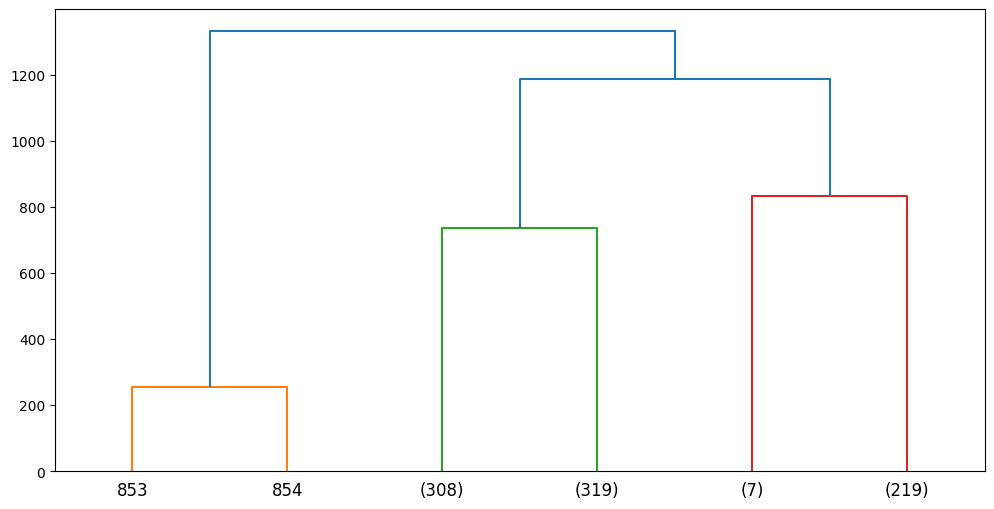

In [8]:
lm0 = hierarchy.linkage(link_average, method='average')
plt.figure(figsize=(12,6))
hierarchy.dendrogram(lm0, p=2, truncate_mode='level');

In [9]:
data_standard1= pd.DataFrame(data_std, columns=cluster.columns)
eu_1 = hierarchy.cut_tree(link_average, n_clusters=2).ravel()
data_standard1['groups'] = eu_1

In [10]:
data_standard1.groupby('groups').agg([np.mean, np.median, lambda x: np.quantile(x, .75) - np.quantile(x, .25)])

ADM_RATE                        SAT_AVG                       \
            mean    median <lambda_0>      mean    median <lambda_0>   
groups                                                                 
0      -0.000869  0.221891   1.159776 -0.000453 -0.191147   1.223331   
1       0.743395  0.743395   0.000000  0.387297  0.387297   0.000000   

          C150_4                      UGDS_WOMEN                       \
            mean    median <lambda_0>       mean    median <lambda_0>   
groups                                                                  
0      -0.001343 -0.009203   1.393318   0.005854  0.006969   0.998979   
1       1.148303  1.148303   0.000000  -5.004871 -5.004871   0.000000   

         STUFACR                       
            mean    median <lambda_0>  
groups                                 
0       0.000864 -0.203263   1.338406  
1      -0.738625 -0.738625   0.000000

In [11]:
data_standard1.groups.value_counts()

groups
0    855
1      1
Name: count, dtype: int64

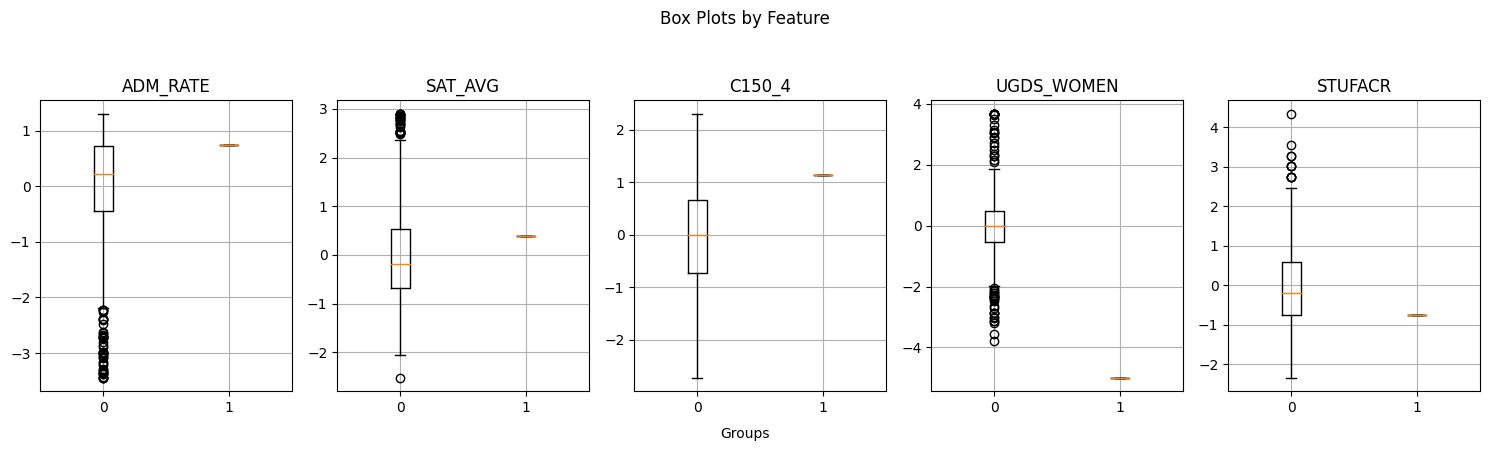

In [12]:
data_standard1['groups'] = data_standard1['groups'].astype('category')
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
features = ['ADM_RATE', 'SAT_AVG', 'C150_4', 'UGDS_WOMEN', 'STUFACR']
for i, feature in enumerate(features):
    ax = axes[i]
    data1 = [data_standard1[data_standard1['groups'] == group][feature] for group in data_standard1['groups'].cat.categories]
    ax.boxplot(data1, labels=data_standard1['groups'].cat.categories)
    ax.set_title(feature)
    ax.grid(True)
fig.text(0.5, -0.02, 'Groups', ha='center')
fig.suptitle('Box Plots by Feature', y=1.05)
plt.tight_layout()
plt.show()

#### The mean and median enrollment rates of Group 1 were significantly higher than those of group 0, indicating that schools in Group 1 had higher enrollment rates. The mean and median SAT scores of students in Group 1 were significantly higher than those in Group 0, indicating that students admitted to schools in Group 1 had higher SAT scores. Group 0 schools performed worse in terms of student completion rates. Both groups had lower mean and median percentages of female undergraduates. The average undergraduate-to-faculty ratio for both groups of schools was close to zero, but there was a very low median in Group 1 that may have been the outlier.

### Manhattan distance

In [13]:
link_s=linkage(data_std, method='single', metric='cityblock')
coph_coeff, _ = cophenet(link_s, pdist(data_std))
print(f'Single linkage Cophenetic Correlation Coefficient: {coph_coeff:.4f}')

Single linkage Cophenetic Correlation Coefficient: 0.6050


In [14]:
link_c=linkage(data_std, method='complete', metric='cityblock')
coph_coeff, _ = cophenet(link_c, pdist(data_std))
print(f'Complete linkage Cophenetic Correlation Coefficient: {coph_coeff:.4f}')

Complete linkage Cophenetic Correlation Coefficient: 0.6467


In [15]:
link_a=linkage(data_std, method='average', metric='cityblock')
coph_coeff, _ = cophenet(link_a, pdist(data_std))
print(f'Average linkage Cophenetic Correlation Coefficient: {coph_coeff:.4f}')

Average linkage Cophenetic Correlation Coefficient: 0.7097


#### A higher correlation coefficient means that the clustering results better retain the distance relationship between the original data points, so for the Manhattan distance, I choose average linkage.

In [16]:
from myscripts import clust
from scipy.cluster import hierarchy

# Compute linkage matrix for hierarchical clustering
linkage_matrix = hierarchy.linkage(data_std, method='average',metric='cityblock')

# Define a range of cluster numbers to consider
k_values = range(2, 9)  # Adjust the range as needed

# Compute Silhouette scores for different cluster numbers
silhouette_scores = clust.compute_silhouette_scores(linkage_matrix, data_std, k_values, verbose=True)

# Find the optimal/near-optimal number of clusters with the highest Silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

# Print the best number of clusters and its Silhouette score
print(f'Optimal Number of Clusters: {best_k}')
print(f'Best Silhouette Score: {best_silhouette:.4f}')

Computing groupings for k=2
Computing score for k=2
Computing groupings for k=3
Computing score for k=3
Computing groupings for k=4
Computing score for k=4
Computing groupings for k=5
Computing score for k=5
Computing groupings for k=6
Computing score for k=6
Computing groupings for k=7
Computing score for k=7
Computing groupings for k=8
Computing score for k=8
Optimal Number of Clusters: 2
Best Silhouette Score: 0.3918


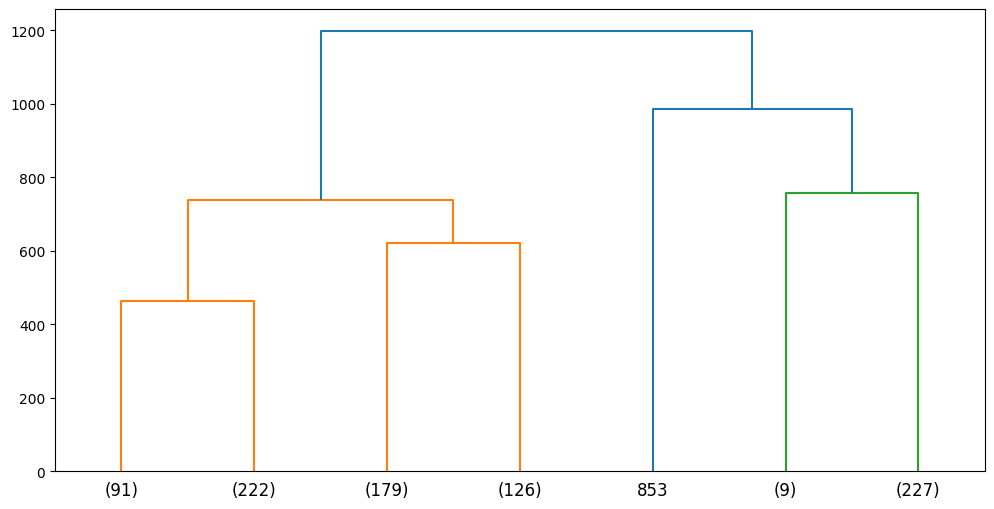

In [17]:
lm1 = hierarchy.linkage(link_a, method='average')
plt.figure(figsize=(12,6))
hierarchy.dendrogram(lm1, p=2, truncate_mode='level');

In [18]:
data_standard2 = pd.DataFrame(data_std, columns=cluster.columns)
ma_1 = hierarchy.cut_tree(link_a, n_clusters=2).ravel()
data_standard2['groups'] = ma_1

In [19]:
data_standard2.groupby('groups').agg([np.mean, np.median, lambda x: np.quantile(x, .75) - np.quantile(x, .25)])

ADM_RATE                        SAT_AVG                       \
            mean    median <lambda_0>      mean    median <lambda_0>   
groups                                                                 
0       0.257012  0.339156   0.912879 -0.286045 -0.331849   0.953651   
1      -1.656051 -1.293635   1.987057  1.843128  1.841225   0.941926   

          C150_4                      UGDS_WOMEN                       \
            mean    median <lambda_0>       mean    median <lambda_0>   
groups                                                                  
0      -0.245622 -0.207457   1.230158   0.047577  0.064326   0.962044   
1       1.582663  1.595298   0.535039  -0.306564 -0.365856   0.720012   

         STUFACR                       
            mean    median <lambda_0>  
groups                                 
0       0.097653  0.064419   1.070725  
1      -0.629225 -0.738625   1.338406

In [20]:
data_standard2.groups.value_counts()

groups
0    741
1    115
Name: count, dtype: int64

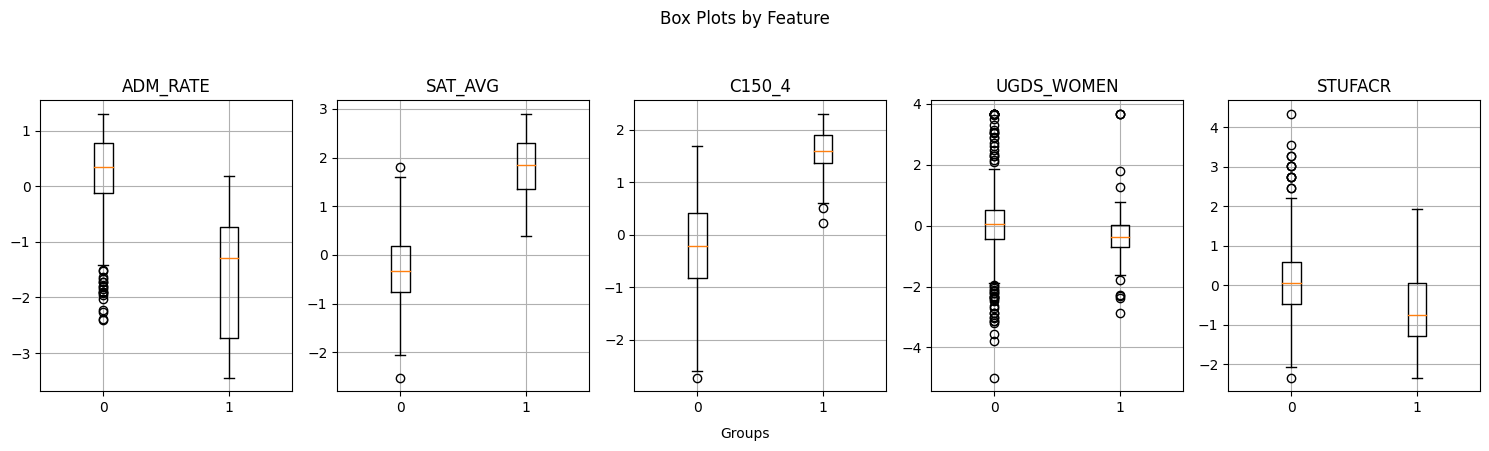

In [21]:
data_standard2['groups'] = data_standard2['groups'].astype('category')
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
features = ['ADM_RATE', 'SAT_AVG', 'C150_4', 'UGDS_WOMEN', 'STUFACR']
for i, feature in enumerate(features):
    ax = axes[i]
    data2 = [data_standard2[data_standard2['groups'] == group][feature] for group in data_standard2['groups'].cat.categories]
    ax.boxplot(data2, labels=data_standard2['groups'].cat.categories)
    ax.set_title(feature)
    ax.grid(True)
fig.text(0.5, -0.02, 'Groups', ha='center')
fig.suptitle('Box Plots by Feature', y=1.05)
plt.tight_layout()
plt.show()

#### Group 0 schools have significantly higher acceptance rates than group 1 schools.group 0 schools have significantly lower average SAT scores than group 1 schools. Group 0 schools perform better in terms of student completion rates. There was no significant difference between the two groups in the proportion of undergraduate students who were women. Group 0 schools may have more faculty or fewer undergraduates.

# Question 2: Regression

**Use the data in the file `MRCI_regr_2310.csv`.**

Use the `statsmodels` package. After you fit a regression model in **each** part, be sure to
* assess its fit,
* study the residuals,
* check for influential points, and
* check for multicollinearity.

*For multicollinearity, you can report what is known as the Variance Inflation Factor (VIF) of the model, but include a small paragraph or two on what is multicollinearity and how it can affect your model.*

1. Fit a regression model of `MD_EARN_WNE_1YR` on all of `ADM_RATE`, `SAT_AVG`, `UGDS`, `COSTT4_A`, `C150_4`, `UGDS_WOMEN` and `STUFACR`. *Do not standardise these variables.* Outline your findings and suggest *a few* other regression models you might consider fitting. *There is no need at this point to fit the regression models you suggested.*

Here are a couple of comments from your boss when you show him/her the analysis:
* "Have you tried standardising the variables `ADM_RATE`, `SAT_AVG`, `UGDS`, `COSTT4_A`, `C150_4`, `UGDS_WOMEN` and `STUFACR`?"
* "Have you tried adding `STATE` to your explanatory variables?"

2. Address his/her questions and other concerns you may have from part 1. You may remove the *most influential* point if it exists. Recommend a final regression model.

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oinf
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
reg = pd.read_csv('../data/MRCI_regr_2310.csv')
X = reg[['ADM_RATE', 'SAT_AVG', 'UGDS', 'COSTT4_A', 'C150_4', 'UGDS_WOMEN', 'STUFACR']]
y = reg['MD_EARN_WNE_1YR']
X = sm.add_constant(X)
s_model = sm.OLS(y, X)
s_results = s_model.fit()
s_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_1YR   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     35.77
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           6.92e-44
Time:                        22:15:10   Log-Likelihood:                -8989.4
No. Observations:                 851   AIC:                         1.799e+04
Df Residuals:                     843   BIC:                         1.803e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.44e+04   6241.833      3.908      0.000    1.21e+04    3.66e+04
ADM_RATE     190.1183   1945.929      0.098      0.922   -3629.316    4009.553
SAT_AVG       15.8144      5.303      2.982      0.003       5.405      26.224
UGDS           0.0837      0.055      1.521      0.129      -0.024       0.192
COSTT4_A       0.0490      0.030      1.654      0.098      -0.009       0.107
C150_4      1.204e+04   3852.555      3.125      0.002    4477.105    1.96e+04
UGDS_WOMEN -1.114e+04   2902.217     -3.837      0.000   -1.68e+04   -5438.779
STUFACR     -217.0074    121.077     -1.792      0.073    -454.656      20.641
==============================================================================
Omnibus:                      182.328   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.734
Skew:                           0.877   Prob(JB):                    1.29e-202
Kurtosis:                       7.811   Cond. No.                     8.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

     Variable         VIF
0       const  374.774286
1    ADM_RATE    1.480361
2     SAT_AVG    4.403443
3        UGDS    1.987787
4    COSTT4_A    2.442871
5      C150_4    3.741533
6  UGDS_WOMEN    1.074511
7     STUFACR    1.966060


In [33]:
s_results_inf = s_results.get_influence()
r_star = s_results_inf.get_resid_studentized_external()
RMSPE = np.sqrt((s_results_inf.resid_press**2).mean())
RMSPE

9473.407491069584

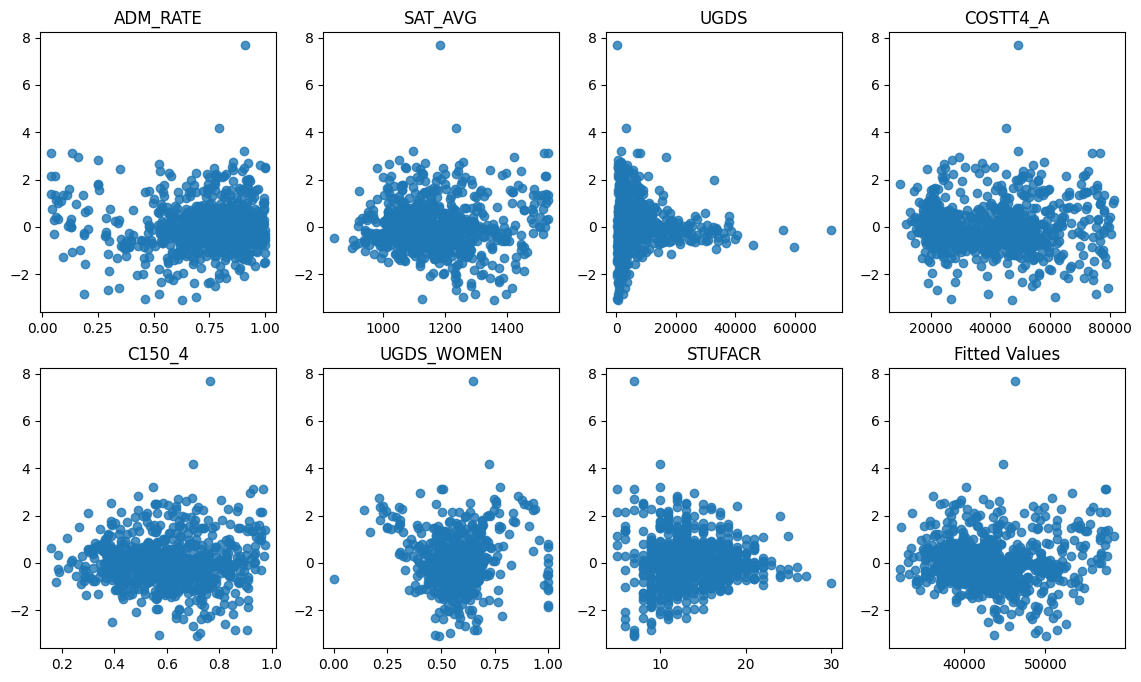

In [34]:
f, axs = plt.subplots(2, 4, squeeze=False, figsize=(14,8))
for i,cc in enumerate(X.columns[1:]):
    plt.subplot(2,4, i+1)
    plt.scatter(X[cc], r_star, alpha=0.8)
    plt.title(cc)

plt.subplot(2,4,8)
plt.scatter(s_results.fittedvalues, r_star, alpha=0.8)
plt.title('Fitted Values');

In [35]:
s_results_inf.dfbetas[:5, :].round(3)

array([[-0.009,  0.013,  0.005, -0.002, -0.006,  0.012, -0.001, -0.01 ],
       [-0.015,  0.007,  0.013, -0.003, -0.003, -0.006,  0.006,  0.008],
       [-0.079,  0.016,  0.102, -0.071, -0.051, -0.043, -0.041,  0.062],
       [-0.012, -0.015, -0.001, -0.021,  0.   ,  0.032, -0.007,  0.026],
       [ 0.001, -0.004,  0.002, -0.019, -0.005,  0.   , -0.002,  0.   ]])

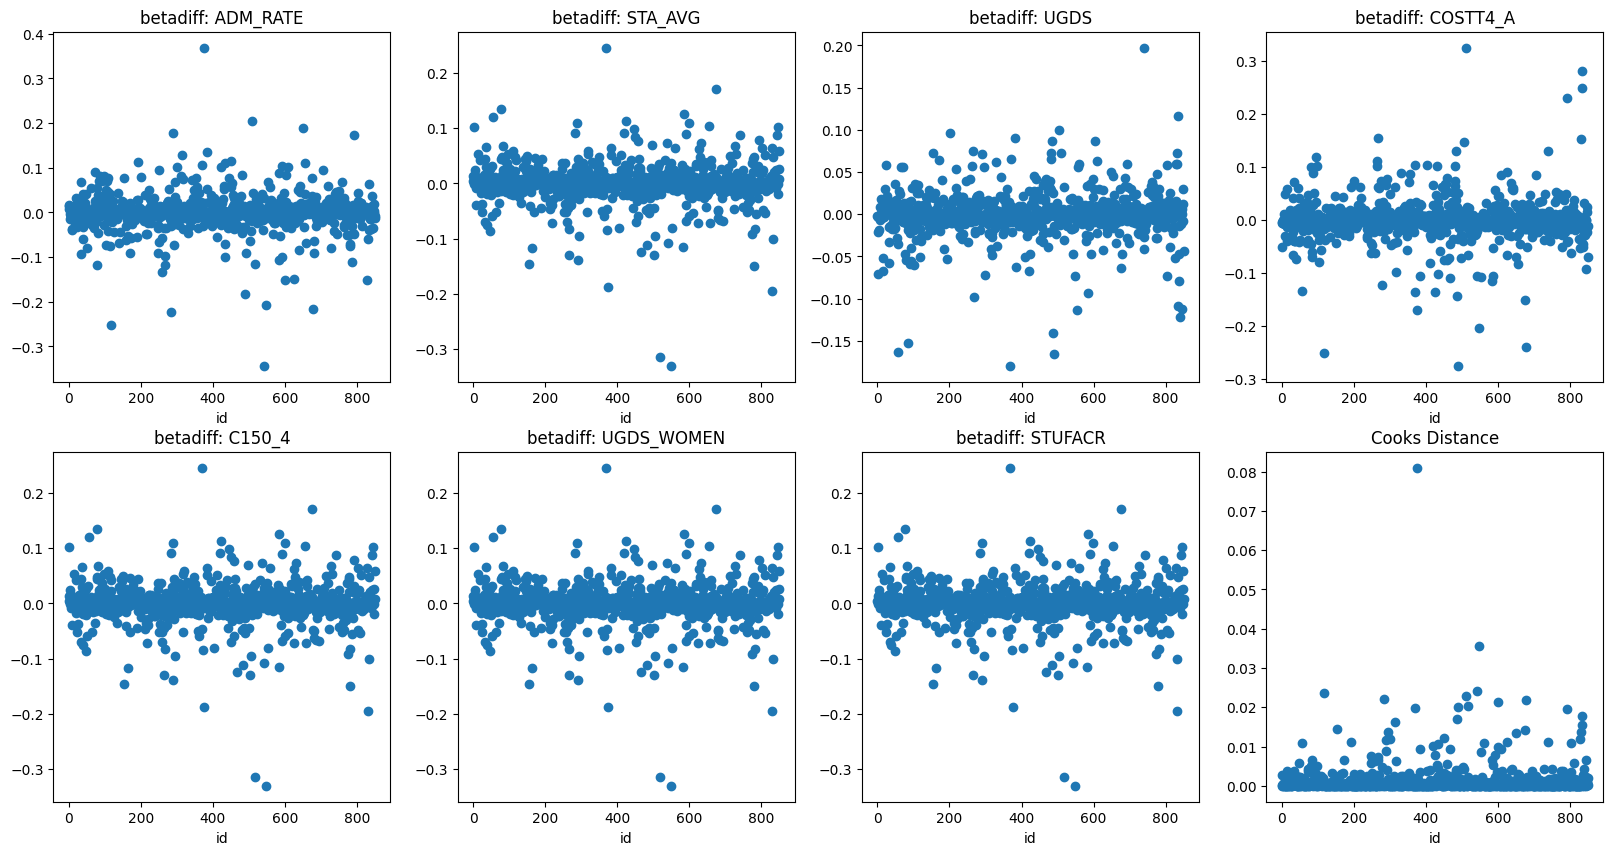

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(241)
plt.scatter(np.arange(851), s_results_inf.dfbetas[:,1]);plt.title('betadiff: ADM_RATE');plt.xlabel('id');
plt.subplot(242)
plt.scatter(np.arange(851), s_results_inf.dfbetas[:,2]);plt.title('betadiff: STA_AVG');plt.xlabel('id');
plt.subplot(243)
plt.scatter(np.arange(851), s_results_inf.dfbetas[:,3]);plt.title('betadiff: UGDS');plt.xlabel('id');
plt.subplot(244)
plt.scatter(np.arange(851), s_results_inf.dfbetas[:,4]);plt.title('betadiff: COSTT4_A');plt.xlabel('id');
plt.subplot(245)
plt.scatter(np.arange(851), s_results_inf.dfbetas[:,2]);plt.title('betadiff: C150_4');plt.xlabel('id');
plt.subplot(246)
plt.scatter(np.arange(851), s_results_inf.dfbetas[:,2]);plt.title('betadiff: UGDS_WOMEN');plt.xlabel('id');
plt.subplot(247)
plt.scatter(np.arange(851), s_results_inf.dfbetas[:,2]);plt.title('betadiff: STUFACR');plt.xlabel('id');
plt.subplot(248)
plt.scatter(np.arange(851), s_results_inf.cooks_distance[0]);plt.title('Cooks Distance');plt.xlabel('id');


In [37]:
np.where(s_results_inf.cooks_distance[0] == np.max(s_results_inf.cooks_distance[0]))

(array([375], dtype=int64),)

In [38]:
reg.loc[[375]]

,ADM_RATE,SAT_AVG,UGDS,COSTT4_A,C150_4,UGDS_WOMEN,STUFACR,MD_EARN_WNE_1YR,STATE
375,0.9108,1185.0,254.0,49252.0,0.766,0.6496,7.0,118133.0,Missouri


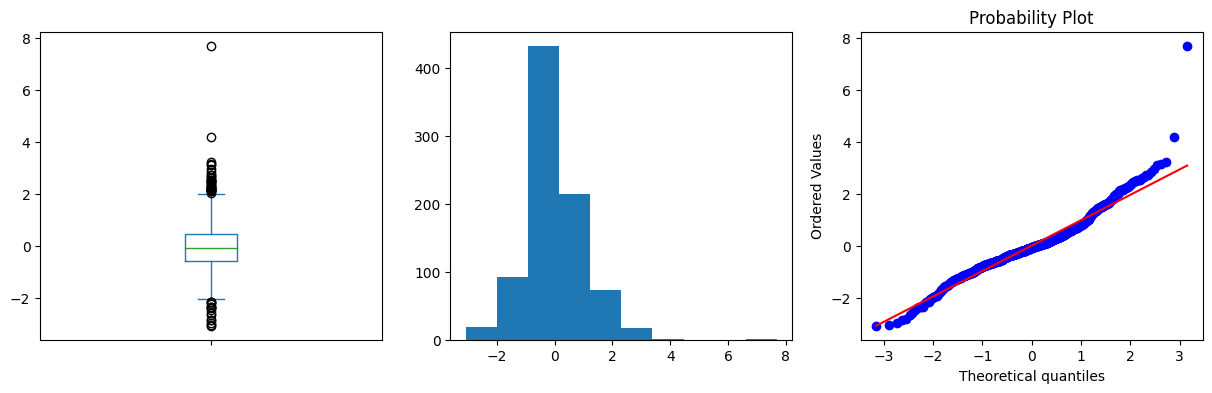

In [39]:
from myscripts.inference import check_normality as cn
cn(pd.Series(r_star))

#### Omnibus and Jarque-Bera are used to test whether the model's residuals conform to the normal distribution hypothesis. The P-value of Omnibus test is very small, indicating that the residuals do not obey the normal distribution. And you can see that his scatter plots always have unfitting data that needs to be removed. Taken together, the model explains some of the variability of the dependent variables, but there are some problems, including possible non-normality, autocorrelation, and multicollinearity.According to the VIF values provided, only SAT_AVG and C150_4 have moderate multicollinearity with the other variables in the model.

### 2.Address his/her questions and other concerns you may have from part 1. You may remove the most influential point if it exists. Recommend a final regression model.

In [40]:
from sklearn.preprocessing import StandardScaler

reg2 = pd.read_csv('../data/MRCI_regr_2310.csv')
reg2 = reg2.drop(index=375).reset_index(drop=True)
y2 = reg2['MD_EARN_WNE_1YR']
lg = reg2.loc[:, ['ADM_RATE','SAT_AVG', 'C150_4','UGDS_WOMEN','STUFACR']]
lg.loc[:, 'lUGDS'] = np.log(reg2.UGDS)
lg.loc[:, 'lCOSTT4_A'] = np.log(reg2.COSTT4_A)
lg = sm.add_constant(lg)

In [41]:
scaler = StandardScaler()
std = scaler.fit_transform(lg[['ADM_RATE', 'SAT_AVG','lUGDS','lCOSTT4_A','C150_4', 'UGDS_WOMEN', 'STUFACR']])
X2 = pd.DataFrame(std, columns=['ADM_RATE', 'SAT_AVG','lUGDS','lCOSTT4_A','C150_4', 'UGDS_WOMEN', 'STUFACR'])
X2 = sm.add_constant(X2)
s2_model = sm.OLS(y2, X2)
s2_results = s2_model.fit()
s2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_1YR   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     43.67
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           9.58e-53
Time:                        22:17:12   Log-Likelihood:                -8932.8
No. Observations:                 850   AIC:                         1.788e+04
Df Residuals:                     842   BIC:                         1.792e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.311e+04    305.605    141.072      0.000    4.25e+04    4.37e+04
ADM_RATE    -229.5165    370.862     -0.619      0.536    -957.440     498.406
SAT_AVG     1253.4728    651.305      1.925      0.055     -24.900    2531.846
lUGDS       2825.9295    473.283      5.971      0.000    1896.977    3754.882
lCOSTT4_A   1219.0746    449.969      2.709      0.007     335.883    2102.267
C150_4      1269.4351    593.717      2.138      0.033     104.096    2434.774
UGDS_WOMEN -1485.4634    318.204     -4.668      0.000   -2110.030    -860.896
STUFACR    -1897.9886    456.913     -4.154      0.000   -2794.811   -1001.166
==============================================================================
Omnibus:                       78.407   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.527
Skew:                           0.649   Prob(JB):                     5.52e-28
Kurtosis:                       4.364   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif_data)

     Variable       VIF
0       const  1.000000
1    ADM_RATE  1.472670
2     SAT_AVG  4.542026
3       lUGDS  2.398401
4   lCOSTT4_A  2.167928
5      C150_4  3.774324
6  UGDS_WOMEN  1.084158
7     STUFACR  2.235360


#### From VIF changes, it can be seen that normalization and dropping extreme values can strengthen multilinear relationships.

In [43]:
dummies = pd.get_dummies(reg2['STATE'], drop_first=True, dtype=float)
X3 = pd.concat([X2, dummies], axis=1)
X3 = sm.add_constant(X3)
s3_model = sm.OLS(y2, X3)
s3_result = s3_model.fit()
s3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_1YR   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     7.608
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.61e-44
Time:                        22:17:13   Log-Likelihood:                -8881.6
No. Observations:                 850   AIC:                         1.788e+04
Df Residuals:                     793   BIC:                         1.815e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.299e+04   2337.769     18.390      0.000    3.84e+04    4.76e+04
ADM_RATE              -698.4232    383.302     -1.822      0.069   -1450.831      53.984
SAT_AVG               1387.7435    669.750      2.072      0.039      73.051    2702.436
lUGDS                 2913.0620    478.778      6.084      0.000    1973.240    3852.884
lCOSTT4_A              976.9075    470.638      2.076      0.038      53.065    1900.750
C150_4                 813.6715    626.269      1.299      0.194    -415.669    2043.012
UGDS_WOMEN           -1324.2848    326.121     -4.061      0.000   -1964.447    -684.123
STUFACR              -2013.5624    475.319     -4.236      0.000   -2946.595   -1080.530
Alaska                4267.1168   8986.712      0.475      0.635   -1.34e+04    2.19e+04
Arizona               4808.4538   6575.380      0.731      0.465   -8098.754    1.77e+04
Arkansas             -5069.3081   3495.717     -1.450      0.147   -1.19e+04    1792.644
California            -440.4504   2937.587     -0.150      0.881   -6206.816    5325.916
Colorado               753.0963   3345.494      0.225      0.822   -5813.974    7320.167
Connecticut           4404.7308   3319.364      1.327      0.185   -2111.049    1.09e+04
Delaware               671.8832   8989.781      0.075      0.940    -1.7e+04    1.83e+04
District of Columbia  -118.9516   4563.886     -0.026      0.979   -9077.678    8839.775
Florida              -2210.2008   2832.818     -0.780      0.435   -7770.909    3350.507
Georgia               -202.0157   2857.764     -0.071      0.944   -5811.692    5407.661
Hawaii               -5384.2950   5504.126     -0.978      0.328   -1.62e+04    5420.083
Idaho                -6735.0207   5524.407     -1.219      0.223   -1.76e+04    4109.170
Illinois              1131.2023   2795.300      0.405      0.686   -4355.859    6618.264
Indiana               1101.3392   2874.300      0.383      0.702   -4540.797    6743.475
Iowa                  -702.6867   3214.395     -0.219      0.827   -7012.415    5607.041
Kansas                2841.1338   3521.556      0.807      0.420   -4071.540    9753.807
Kentucky              -914.9571   3408.823     -0.268      0.788   -7606.340    5776.426
Louisiana             -766.2312   3135.143     -0.244      0.807   -6920.392    5387.929
Maine                 2901.5683   5518.518      0.526      0.599   -7931.062    1.37e+04
Maryland             -2123.8115   3507.372     -0.606      0.545   -9008.643    4761.019
Massachusetts         2982.7083   2769.995      1.077      0.282   -2454.680    8420.097
Michigan              3452.8790   2987.904      1.156      0.248   -2412.257    9318.015
Minnesota             1596.2693   3205.598      0.498      0.619   -4696.191    7888.729
Mississippi          -5234.7188   3284.360     -1.594    

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X3.columns
vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
print(vif_data)

                Variable        VIF
0                  const  62.153874
1               ADM_RATE   1.670892
2                SAT_AVG   5.101413
3                  lUGDS   2.606954
4              lCOSTT4_A   2.519059
5                 C150_4   4.460534
6             UGDS_WOMEN   1.209545
7                STUFACR   2.569422
8                 Alaska   1.079286
9                Arizona   1.154236
10              Arkansas   1.775229
11            California   3.018369
12              Colorado   1.916975
13           Connecticut   2.029885
14              Delaware   1.080023
15  District of Columbia   1.385235
16               Florida   3.107417
17               Georgia   2.856562
18                Hawaii   1.211738
19                 Idaho   1.220684
20              Illinois   3.316042
21               Indiana   2.993100
22                  Iowa   2.170259
23                Kansas   1.801570
24              Kentucky   1.839337
25             Louisiana   2.190967
26                 Maine   1

### It can be seen that the value of R square increases when STATE is added, but 'P> |t| 'most are too large（general less than 0.05）. It is possible that this is an overfit, which requires more data to verify. Therefore, we should choose to standardize without adding STATE. Also, variables with p greater than 0.05 can be removed.
### I would recommend models that standardize and log over big data UGDS and COSTT4_A. But do not add STATE(because most of them are greater than 0.05, you can also keep less than 0.05)
### model: MD_EARN_WNE_1YR = β0 + β1 * SAT_AVG + β2 * C150_4 + β3 * UGDS_WOMEN+ β4 * IUGDS + β5 * ICOSTT4_A + β6 * STUFACR +     ε